In [ ]:
!pip install alibi bitstring shap interpret sklearn
import tensorflow as tf
# print(tf.__version__)
import collections
import pandas as pd
import numpy as np
import glob, ast
import random
from tensorflow.python.ops import init_ops
from tensorflow.contrib.slim import initializers
slim = tf.contrib.slim
restore=False

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount= True)
import math

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [ ]:
"""
#I commented this out, since the information I already stored to a pickle, saving us computation time. 
# with open('/gdrive/My Drive/deepsets/maxmin_cardinalities.json', 'r') as f:
#   file_contents = f.read()
#   contents = ast.literal_eval(file_contents)
#   max_cardinality = contents["Max Cardinality"]
max_cardinality = 0#6.569443203906885#3710592#
min_cardinality=10000000
joins_set=set()
data_dict = {}
allfiles = glob.glob('/gdrive/My Drive/deepsets/job-light-no-samples' + '/*.json', recursive=True)
max_columns_in_db=108
max_tables_in_db=21

#For regressors
max_columns_in_query=0
max_tables_in_query=0
max_joins_in_query=0
max_predicates_in_query=0
test_data_keys=set()
train_data_keys=set()
import json
for embedded_file in allfiles:
  with open(embedded_file, 'r') as f:
    contents = json.load(f)
    filename = contents["Query Number"]
    test_data_keys.add(filename)
    internal_dict = {}
    internal_dict["Tables"] = contents["Tables"]
    internal_dict["Query"] = contents["Query"]
    #AND predicate with string value
    internal_dict["AND Predicate Norm"] = contents["AND Predicate Norm"]
    jsb = contents["Joins"]
    js2=[]
    for it in jsb:
      js=it.split("-")
      js[0]=int(js[0])
      js[1]=int(js[1])
      temp=js[1]
      if js[0]>js[1]:
        js[1]=js[0]
        js[0]=temp
      joins_set.add(str(js[0])+"-"+str(js[1]))
      js2.append(str(js[0])+"-"+str(js[1]))
    internal_dict["Joins"] = js2
    if len(internal_dict["Tables"])>max_tables_in_query:
      max_tables_in_query=len(internal_dict["Tables"])
    if len(internal_dict["AND Predicate Norm"])>max_predicates_in_query:
      max_predicates_in_query=len(internal_dict["AND Predicate Norm"])
    if len(internal_dict["Joins"])>max_joins_in_query:
      max_joins_in_query=len(internal_dict["Joins"])
    internal_dict["Cardinality"] = contents["Cardinality"]
    if contents["Cardinality"] > max_cardinality:
      max_cardinality= contents["Cardinality"]
    if contents["Cardinality"] < min_cardinality:
      min_cardinality = contents["Cardinality"]
    data_dict[filename] = internal_dict
print(data_dict.keys())
print(data_dict.get("job_light_1",{}).get("Tables",{}))
print(data_dict.get("job_light_1",{}).get("Query",{}))
print(data_dict.get("job_light_1",{}).get("Joins",{}))
print(data_dict.get("job_light_1",{}).get("AND Predicate Norm",{}))
print(data_dict["job_light_1"]["Cardinality"])

allfiles = glob.glob('/gdrive/My Drive/deepsets/synthetic-no-samples' + '/*.json', recursive=True)
for embedded_file in allfiles:
  with open(embedded_file, 'r') as f:
    contents = json.load(f)
    filename = contents["Query Number"]
    train_data_keys.add(filename)
    internal_dict = {}
    internal_dict["Tables"] = contents["Tables"]
    internal_dict["Query"] = contents["Query"]
    #AND predicate with string value
    internal_dict["AND Predicate Norm"] = contents["AND Predicate Norm"]
    jsb = contents["Joins"]
    js2=[]
    for it in jsb:
      js=it.split("-")
      js[0]=int(js[0])
      js[1]=int(js[1])
      temp=js[1]
      if js[0]>js[1]:
        js[1]=js[0]
        js[0]=temp
      joins_set.add(str(js[0])+"-"+str(js[1]))
      js2.append(str(js[0])+"-"+str(js[1]))
    internal_dict["Joins"] = js2
    if len(internal_dict["Tables"])>max_tables_in_query:
      max_tables_in_query=len(internal_dict["Tables"])
    if len(internal_dict["AND Predicate Norm"])>max_predicates_in_query:
      max_predicates_in_query=len(internal_dict["AND Predicate Norm"])
    if len(internal_dict["Joins"])>max_joins_in_query:
      max_joins_in_query=len(internal_dict["Joins"])
    internal_dict["Cardinality"] = contents["Cardinality"]
    if contents["Cardinality"] > max_cardinality:
      max_cardinality= contents["Cardinality"]
    if contents["Cardinality"] < min_cardinality:
      min_cardinality = contents["Cardinality"]
    data_dict[filename] = internal_dict

list_of_joins=sorted(list(joins_set))
joins_to_int=dict()
counter=0
for it in list_of_joins:
  joins_to_int[it]=counter
  counter+=1
NUM_JOINS=len(joins_to_int.keys())
max_cardinality= math.log(max_cardinality)
min_cardinality= math.log(min_cardinality)
for item in data_dict:
  data_dict[item]["Cardinality"]=(math.log(data_dict[item]["Cardinality"])-min_cardinality)/(max_cardinality-min_cardinality)



print(data_dict["job_light_1"]["Cardinality"])
"""

In [ ]:
import pickle
write_data=False
if write_data:#If you recreate from the drive, and would like to save new pickles...
  stats= (min_cardinality, max_cardinality, NUM_JOINS, max_columns_in_db, max_tables_in_db, max_columns_in_query, max_tables_in_query, max_joins_in_query, max_predicates_in_query)
  with open('/gdrive/My Drive/deepsets/stats.pkl', 'wb') as f:
    pickle.dump(stats, f)
  with open('/gdrive/My Drive/deepsets/query_dictionary.pkl', 'wb') as f:
    pickle.dump(data_dict, f) 
  with open('/gdrive/My Drive/deepsets/test_data_keys.pkl', 'wb') as f:
    pickle.dump(test_data_keys, f)
  with open('/gdrive/My Drive/deepsets/train_data_keys.pkl', 'wb') as f:
    pickle.dump(train_data_keys, f)  
  with open('/gdrive/My Drive/deepsets/joins_to_int.pkl', 'wb') as f:
    pickle.dump(joins_to_int, f)  
with open('/gdrive/My Drive/deepsets/stats.pkl', 'rb') as f:
  stats = pickle.load(f)
with open('/gdrive/My Drive/deepsets/query_dictionary.pkl', 'rb') as f:
  data_dict = pickle.load(f)
with open('/gdrive/My Drive/deepsets/test_data_keys.pkl', 'rb') as f:
  test_data_keys = pickle.load(f)
with open('/gdrive/My Drive/deepsets/train_data_keys.pkl', 'rb') as f:
  train_data_keys = pickle.load(f)
with open('/gdrive/My Drive/deepsets/joins_to_int.pkl', 'rb') as f:
  joins_to_int = pickle.load(f)

min_cardinality=stats[0]
max_cardinality=stats[1] 
NUM_JOINS=stats[2] 
max_columns_in_db=stats[3] 
max_tables_in_db=stats[4] 
max_columns_in_query=stats[5] 
max_tables_in_query=stats[6]
max_joins_in_query=stats[7] 
max_predicates_in_query=stats[8]

"""
with open("/gdrive/My Drive/deepsets/query_cardinality.csv") as f:
  for i, line in enumerate(f):             
    arr=line.split(',')
    data_dict[arr[0]]["Cardinality"]=(int(arr[1])-min_cardinality)/max_cardinality-min_cardinality
print(data_dict["1b.sql"]["Cardinality"])
"""

'\nwith open("/gdrive/My Drive/deepsets/query_cardinality.csv") as f:\n  for i, line in enumerate(f):             \n    arr=line.split(\',\')\n    data_dict[arr[0]]["Cardinality"]=(int(arr[1])-min_cardinality)/max_cardinality-min_cardinality\nprint(data_dict["1b.sql"]["Cardinality"])\n'

In [ ]:
data_dict

{'job_light_1': {'AND Predicate Norm': [[70, 2, 0.9285714285714286],
   [59, 2, 1.0]],
  'Cardinality': 0.28601906155818835,
  'Joins': ['61-98', '71-98'],
  'Query': 'SELECT COUNT(*) FROM movie_companies mc,title t,movie_info_idx mi_idx WHERE t.id=mc.movie_id AND t.id=mi_idx.movie_id AND mi_idx.info_type_id=112 AND mc.company_type_id=2;',
  'Tables': [12, 16, 18]},
 'job_light_3': {'AND Predicate Norm': [[70, 2, 0.9285714285714286],
   [59, 2, 1.0],
   [104, 3, 0.935251798561151]],
  'Cardinality': 0.1675545134811303,
  'Joins': ['61-98', '71-98'],
  'Query': 'SELECT COUNT(*) FROM movie_companies mc,title t,movie_info_idx mi_idx WHERE t.id=mc.movie_id AND t.id=mi_idx.movie_id AND mi_idx.info_type_id=112 AND mc.company_type_id=2 AND t.production_year>2010;',
  'Tables': [12, 16, 18]},
 'job_light_68': {'AND Predicate Norm': [[26, 2, 0.1],
   [65, 2, 0.13761467889908258],
   [104, 3, 0.8633093525179856],
   [104, 1, 0.935251798561151],
   [74, 2, 0.052791628468573215]],
  'Cardinality':

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
external_dropout=1.0  #Percentage of things that will remain (1 means no dropout)... 0.8 would be a good value...
internal_dropout=0.65  #Percentage of things that will remain.. 0.65 would be a good value
we_init=initializers.xavier_initializer()
bias_init=init_ops.zeros_initializer()

batch_size=64

table_vlength =256
join_vlength=256
normalized_and_vlength=256
is_training=True#tf.placeholder(tf.bool, shape=(1), name="is_training")
#Placeholders that will serve as a single input for the table_layer, join_layer,or normalized_and_layer, respectively.
temp_tables, temp_joins, temp_normalized_and  = ([] for i in range(3))

#Placeholders that will be fed with the averaged sum of global variable temp_table_vector, temp_joins_vector, temp_and_vector, temp_or_vector, temp_nested_or_vector respectively. They will serve as input to the cardinalities net.
tables_output, joins_output, normalized_and_output = ([] for i in range(3))

cardinalities=[] #Global variable that will hold the output of the cardinalities
target=[] #Global variable used to feed target_ph (place holder for calculating the loss function)

#Components part 4 (add to input of the function)
def card_est_last_layers(network_type, tables_output, joins_output, normalized_and_output): #This defines our network
  inp=tf.concat([tables_output, joins_output, normalized_and_output], axis=1)
  net= slim.dropout(slim.fully_connected(inp, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)
  net= slim.dropout(slim.fully_connected(net, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)#Not in original model
  cardinality = slim.fully_connected(net, 1, activation_fn=tf.nn.sigmoid, weights_initializer=we_init, biases_initializer=bias_init)
  return network_type(cardinality)
print("General network function defined")

def tables_layers(network_type, tables): #This defines our network
  tables_net= slim.dropout(slim.fully_connected(tables, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), external_dropout, is_training=is_training)
  tables_net= slim.dropout(slim.fully_connected(tables_net, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)
  table_vector = slim.dropout(slim.fully_connected(tables_net, table_vlength, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)
  return network_type(table_vector)

print("Tables network function defined")

def joins_layers(network_type, joins): #This defines our network
  joins_net= slim.dropout(slim.fully_connected(joins, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), external_dropout, is_training=is_training)
  joins_net= slim.dropout(slim.fully_connected(joins_net, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)
  join_vector = slim.dropout(slim.fully_connected(joins_net, join_vlength,activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)
  return network_type(join_vector)

print("Joins network function defined")

def normalized_and_layers(network_type, normalized_ands): #This defines our network
  normalized_and_net= slim.dropout(slim.fully_connected(normalized_ands, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), external_dropout, is_training=is_training)
  normalized_and_net= slim.dropout(slim.fully_connected(normalized_and_net, 256, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)
  normalized_and_vector = slim.dropout(slim.fully_connected(normalized_and_net, normalized_and_vlength, activation_fn=tf.nn.relu, weights_initializer=we_init, biases_initializer=bias_init), internal_dropout, is_training=is_training)
  return network_type(normalized_and_vector)

print("Normalized Ands network function defined")


tf_device='/gpu:0'
print("Device defined")

#Components part 6 (add to input)
def _general_network_template(tables_outputs, joins_outputs, normalized_and_output):
  return card_est_last_layers(collections.namedtuple('DS_network', ['values']), tables_outputs, joins_outputs, normalized_and_output)

print("General network wrapper function defined")

def _tables_network_template(tables):
  return tables_layers(collections.namedtuple('tables_network', ['values']), tables)

print("Tables network wrapper function defined")

def _joins_network_template(joins):
  return joins_layers(collections.namedtuple('joins_network', ['values']), joins)

print("Joins network wrapper function defined")


def _normalized_and_network_template(normalized_ands):
  return normalized_and_layers(collections.namedtuple('normalized_and_network', ['values']), normalized_ands)

print("Normalized Ands network wrapper function defined")


General network function defined
Tables network function defined
Joins network function defined
Normalized Ands network function defined
Device defined
General network wrapper function defined
Tables network wrapper function defined
Joins network wrapper function defined
Normalized Ands network wrapper function defined


In [ ]:
#Components part 8: Add to input of net
def _build_general_network():
  global cardinalities
  net= tf.make_template('network', _general_network_template)
  cardinalities = net(tables_output, joins_output, normalized_and_output)

def _build_tables_network():
  global tables_output
  tables_net= tf.make_template('tables_network', _tables_network_template)  
  tables_output= tables_net(temp_tables)
  tables_output= tf.multiply(tables_output, temp_tables_mask)
  tables_output=tf.reduce_sum(tables_output, 2)[0]
  tables_output=tf.divide(tables_output,temp_tables_count)

def _build_normalized_and_network():
  global normalized_and_output
  normalized_and_net= tf.make_template('normalized_and_network', _normalized_and_network_template)
  normalized_and_output= normalized_and_net(temp_normalized_and)
  normalized_and_output= tf.multiply(normalized_and_output, temp_normalized_and_mask)
  normalized_and_output=tf.reduce_sum(normalized_and_output, 2)[0]
  normalized_and_output=tf.divide(normalized_and_output,temp_normalized_and_count)

#Components part 9 (new function like build joins network)
def _build_joins_network():
  global joins_output
  joins_net= tf.make_template('joins_network', _joins_network_template)
  joins_output= joins_net(temp_joins)
  joins_output= tf.multiply(joins_output, temp_joins_mask)
  joins_output=tf.reduce_sum(joins_output, 2)[0]
  joins_output=tf.divide(joins_output,temp_joins_count)

optimizer=tf.train.RMSPropOptimizer(learning_rate=0.001)

def _build_train_op():
  loss=tf.keras.losses.MSE(
    cardinalities[0],
    tf.reshape(target_ph, (batch_size, 1))
)

  print_op=tf.print(tf.reduce_mean(loss))
#  print_op2=tf.print({"partial_output":partial_output,"tables_output":tables_output2, "sum":tables_output})
#  print_op3=tf.print([tf.shape(partial_output),tf.shape(tables_output2), tf.shape(tables_output)])
  with tf.variable_scope('Losses'):
    tf.summary.scalar('Loss', tf.reduce_mean(loss))
  with tf.control_dependencies([print_op]):
    a=optimizer.minimize(loss)
    #gvs = optimizer.compute_gradients(loss)
    return a#optimizer.apply_gradients(gvs)

In [ ]:
#Components part 10 - Add the corresponding placeholders and notice that the input size for the temp ones should match
with tf.device(tf_device):
  cardinalities=tf.placeholder(tf.float32, name='cardinalities_ph')
  target_ph=tf.placeholder(tf.float32, name='target')
  it_ph=tf.placeholder(tf.float32, name='iteration')
  #tables_ph=tf.placeholder(tf.float32, (None, None, 6), name='tables_ph')
  tables_output=tf.placeholder(tf.float32, (None, table_vlength), name='tables_output_ph')
  joins_output=tf.placeholder(tf.float32, (None, join_vlength), name='joins_output_ph')
  normalized_and_output=tf.placeholder(tf.float32, (None, normalized_and_vlength), name='normalized_and_output_ph')
  #cnz=tf.placeholder(tf.float32, name='cnz')
  #temp_table_vector=tf.placeholder(tf.float32, (None, table_vlength), name='tables_output_ph')
  temp_tables=tf.placeholder(tf.float32, (None, None, 21), name='temp_table_ph')
  temp_tables_mask=tf.placeholder(tf.float32, (None, None, 1), name='temp_table_mask_ph')
  temp_tables_count=tf.placeholder(tf.float32, (None, table_vlength), name='temp_table_count_ph')

  temp_joins=tf.placeholder(tf.float32, (None, None, NUM_JOINS), name='temp_join_ph') #Note the input size of the temp ones, which should match the size of items in the json
  temp_joins_mask=tf.placeholder(tf.float32, (None, None, 1), name='temp_joins_mask_ph')
  temp_joins_count=tf.placeholder(tf.float32, (None, join_vlength), name='temp_joins_count_ph')

  temp_normalized_and=tf.placeholder(tf.float32, (None, None, 108+3+1), name='temp_normalized_and_ph')
  temp_normalized_and_mask=tf.placeholder(tf.float32, (None, None, 1), name='temp_normalized_and_mask_ph')
  temp_normalized_and_count=tf.placeholder(tf.float32, (None, normalized_and_vlength), name='temp_normalized_and_count_ph')

  is_training=tf.placeholder(tf.bool, name="is_training")
  table_net= _build_tables_network()
  join_net= _build_joins_network()
  normalized_and_net= _build_normalized_and_network()
  net= _build_general_network()
  _train_op = _build_train_op()

print("Device selected and variables initialized")
    
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True
_sess = tf.Session('', config=config)
init_op = tf.global_variables_initializer()
saver = tf.train.Saver()
if not restore:
  _sess.run(init_op)
# else:
#   saver.restore(_sess, "/tmp/model.ckpt")
# print("Tensorflow session initalized")


Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Device selected and variables initialized


Test and train split

In [ ]:
from functools import cmp_to_key
def startof_compare(x, y):
  xval=int(''.join(c for c in x if c.isdigit()))
  yval=int(''.join(c for c in y if c.isdigit()))
  if xval==yval:
    if x>y:
      return 1
    elif x<y:
      return -1
    else:
      return 0
  if xval>yval:
    return 1
  else:
    return -1

if batch_size>len(train_data_keys):
  batch_size=len(train_data_keys)



In [ ]:
import math
from bitstring import BitArray
total_it = 5000
num_epochs=2
probs=[]
steer=True
diff=np.full((len(list(train_data_keys))), max_cardinality)
diff=np.array([x / np.sum(diff) for x in diff])
diff_q_names=[x for x in sorted(list(train_data_keys))]
import sys
original_stdout = sys.stdout
#sys.stdout = open('/tmp/errors.txt', 'w')
for num in range(0,total_it):
  print(num)
  if steer:
    queries= np.random.choice(np.array(list(train_data_keys)), batch_size, replace=False, p=diff)
  else:
    queries= np.random.choice(np.array(list(train_data_keys)), batch_size, replace=False)
  if num==total_it-1: #WE TEST IN THE LAST ITERATION
    queries= list(test_data_keys) + list (train_data_keys)
    queries= sorted(queries, key=cmp_to_key(startof_compare))

  target=[]

  #Components part 11 input and max items variables
  tables_input=[]
  joins_input=[]
  normalized_and_input=[]
  max_items=0
  max_items_joins=0
  max_items_normalized_and=0
  q_names=[]
  for item in queries:
    q_names.append(item)
    target.append(data_dict[item]["Cardinality"])
    current_table=[]
    if len(data_dict[item]["Tables"])>max_items:
      max_items= len(data_dict[item]["Tables"])
    for item2 in data_dict[item]["Tables"]:
      arr2=[float(0) for x in range(0,21)]
      arr2[int(item2)]=1.0
      current_table.append(arr2)
    tables_input.append(current_table)
    
    current_join=[]
    if len(data_dict[item]["Joins"])>max_items_joins:
      max_items_joins= len(data_dict[item]["Joins"])
    for item2 in data_dict[item]["Joins"]:
      join_nr=joins_to_int[item2]
      arr=[float(0) for x in range(0,NUM_JOINS)]
      arr[join_nr]=1.0
      current_join.append(arr)
    joins_input.append(current_join)

    current_normalized_and=[]
    for item2 in data_dict[item]["AND Predicate Norm"]:
      
      
      arr0=[float(0) for x in range(0,108+3+1)]
      arr0[item2[0]]=1.0
      arr0[108+item2[1]-1]=1.0 #Operators
      arr0[108+3]=float(item2[2])
      current_normalized_and.append(arr0)
    if len(current_normalized_and)>max_items_normalized_and:
      max_items_normalized_and= len(current_normalized_and)
    normalized_and_input.append(current_normalized_and)

  #Components part 13 (padding according to max items)
  tables_mask=[]#
  tables_count=[]#
  for i in range(0,len(tables_input)):
    mask_this_table=[[1] for x in range(0,len(tables_input[i]))] #
    tables_count.append([len(tables_input[i]) if len(tables_input[i])>0 else 1 for x in range(0,table_vlength)])#
    while len(tables_input[i])<max_items:
      tables_input[i].append([0 for x in range(0,21)])
      mask_this_table.append([0])#
    if len(tables_input[i])==0:
      tables_input[i].append([0 for x in range(0,21)])
      mask_this_table.append([0])#
    tables_mask.append(mask_this_table)#
  
  joins_mask=[]
  joins_count=[]
  arr=[float(0) for x in range(0,NUM_JOINS)]
  for i in range(0,len(joins_input)):
    mask_this_query=[[1] for x in range(0,len(joins_input[i]))] 
    joins_count.append([len(joins_input[i]) if len(joins_input[i])>0 else 1 for x in range(0,join_vlength)])
    while len(joins_input[i])<max_items_joins:
      joins_input[i].append(arr)
      mask_this_query.append([0])
    if len(joins_input[i])==0:
      joins_input[i].append(arr)
      mask_this_query.append([0])
    joins_mask.append(mask_this_query)
  
  normalized_and_mask=[]#
  normalized_and_count=[]#
  for i in range(0,len(normalized_and_input)):
    mask_this_q_normalized_and=[[1] for x in range(0,len(normalized_and_input[i]))] #
    normalized_and_count.append([len(normalized_and_input[i]) if len(normalized_and_input[i])>0 else 1 for x in range(0,normalized_and_vlength)])#
    while len(normalized_and_input[i])<max_items_normalized_and:
      normalized_and_input[i].append([0 for i in range(0,108+3+1)])
      mask_this_q_normalized_and.append([0])#
    if len(normalized_and_input[i])==0:
      normalized_and_input[i].append([0 for i in range(0,108+3+1)])
      mask_this_q_normalized_and.append([0])#
    normalized_and_mask.append(mask_this_q_normalized_and)#
  #print(normalized_and_mask)
  #print(normalized_and_count)
  
  #Components part 14, give the input to the temp place holder in the feed_dict
  clean_results=[]
  clean_target=[]
  if num!=total_it-1:# and num%50!=0:
    for epoch in range(0,num_epochs):
      #print(tables_input)
      #print(tables_mask)
      [result]=_sess.run([_train_op], feed_dict={it_ph:num, target_ph:target, is_training:True,
      temp_tables:np.array(tables_input, dtype=np.float32), temp_tables_mask:np.array(tables_mask, dtype=np.float32), temp_tables_count:np.array(tables_count, dtype=np.float32), 
      temp_joins:np.array(joins_input, dtype=np.float32), temp_joins_mask:np.array(joins_mask, dtype=np.float32), temp_joins_count:np.array(joins_count, dtype=np.float32), 
      temp_normalized_and:np.array(normalized_and_input, dtype=np.float32), temp_normalized_and_mask:np.array(normalized_and_mask, dtype=np.float32), temp_normalized_and_count:np.array(normalized_and_count, dtype=np.float32) 
      })
    if steer:
      [result]=_sess.run([cardinalities], feed_dict={it_ph:num, target_ph:target, is_training:False,
      temp_tables:np.array(tables_input, dtype=np.float32), temp_tables_mask:np.array(tables_mask, dtype=np.float32), temp_tables_count:np.array(tables_count, dtype=np.float32), 
      temp_joins:np.array(joins_input, dtype=np.float32), temp_joins_mask:np.array(joins_mask, dtype=np.float32), temp_joins_count:np.array(joins_count, dtype=np.float32), 
      temp_normalized_and:np.array(normalized_and_input, dtype=np.float32), temp_normalized_and_mask:np.array(normalized_and_mask, dtype=np.float32), temp_normalized_and_count:np.array(normalized_and_count, dtype=np.float32) 
      })
      for it in range(0,len(result[0])):
        diff[diff_q_names.index(q_names[i])]=int(round(math.e**min_cardinality+(abs(result[0][it][0]-target[it])*(max_cardinality-min_cardinality))))
      for it in range(0,len(diff)):
        if diff[it]<=1:
          diff[it]=int(round(math.e**min_cardinality+(diff[it]*(max_cardinality-min_cardinality))))
      if np.sum(diff)==0:
        diff=np.ones(len(list(train_data_keys)))
        diff=np.array([x / np.sum(diff) for x in diff])
      else:
        diff=np.array([x / np.sum(diff) for x in diff])
  """if num%50==0 and num!=total_it-1:
    diff=[]
    [result]=_sess.run([cardinalities], feed_dict={it_ph:num, target_ph:target, temp_tables:np.array(tables_input, dtype=np.float32), temp_tables_mask:np.array(tables_mask, dtype=np.bool_), temp_tables_count:np.array(tables_count, dtype=np.float32), temp_joins:np.array(joins_input, dtype=np.float32), temp_and:np.array(and_input, dtype=np.float32), temp_normalized_and:np.array(normalized_and_input, dtype=np.float32), temp_or:np.array(or_input, dtype=np.float32), temp_nested_or:np.array(nested_or_input, dtype=np.float32)})
    for it in range(0,len(result[0])):
      #print(q_names[it]+"-- Predicted: "+str(result[0][it][0])+", Actual: "+str(target[it]))
      diff.append(math.sqrt((result[0][it][0] - target[it])**2))
    diff=[x / np.sum(diff) for x in diff]
  """
  if num==total_it-1:
    [last_layer]=_sess.run([tf.concat([tables_output, joins_output, normalized_and_output], axis=1)], feed_dict={it_ph:num, target_ph:target, is_training:False,
      temp_tables:np.array(tables_input, dtype=np.float32), temp_tables_mask:np.array(tables_mask, dtype=np.float32), temp_tables_count:np.array(tables_count, dtype=np.float32), 
      temp_joins:np.array(joins_input, dtype=np.float32), temp_joins_mask:np.array(joins_mask, dtype=np.float32), temp_joins_count:np.array(joins_count, dtype=np.float32), 
      temp_normalized_and:np.array(normalized_and_input, dtype=np.float32), temp_normalized_and_mask:np.array(normalized_and_mask, dtype=np.float32), temp_normalized_and_count:np.array(normalized_and_count, dtype=np.float32) 
      })
    [result]=_sess.run([cardinalities], feed_dict={it_ph:num, target_ph:target, is_training:False,
      temp_tables:np.array(tables_input, dtype=np.float32), temp_tables_mask:np.array(tables_mask, dtype=np.float32), temp_tables_count:np.array(tables_count, dtype=np.float32), 
      temp_joins:np.array(joins_input, dtype=np.float32), temp_joins_mask:np.array(joins_mask, dtype=np.float32), temp_joins_count:np.array(joins_count, dtype=np.float32), 
      temp_normalized_and:np.array(normalized_and_input, dtype=np.float32), temp_normalized_and_mask:np.array(normalized_and_mask, dtype=np.float32), temp_normalized_and_count:np.array(normalized_and_count, dtype=np.float32) 
      })
    #tables_output, joins_output, and_output, normalized_and_output, or_output, nested_or_output
    sys.stdout = original_stdout
    for it in range(0,len(result[0])):
      if q_names[it] not in train_data_keys:
          print(q_names[it]+"-- Predicted: "+str(result[0][it][0])+", Actual: "+str(target[it]))
      clean_results.append(result[0][it][0])
      clean_target.append(target[it])
save_path = saver.save(_sess, "/tmp/model.ckpt")





Streaming output truncated to the last 5000 lines.
0.00531758834
0.00547103025
3357
0.00202928507
0.00480414834
3358
0.0045415028
0.00385197671
3359
0.00164859579
0.00190099725
3360
0.00347102527
0.00249556871
3361
0.00424795924
0.00294428249
3362
0.00305626239
0.00294611091
3363
0.00541155227
0.00360026839
3364
0.00247302931
0.00274696387
3365
0.00315715186
0.00375171588
3366
0.00470674783
0.00254451949
3367
0.00670548715
0.00393322669
3368
0.00435987348
0.00230328552
3369
0.00328035769
0.0030535988
3370
0.00309433788
0.0017732
3371
0.00183578441
0.0014499377
3372
0.0031272436
0.00414966233
3373
0.00385894091
0.00469488371
3374
0.00202943268
0.0017183586
3375
0.00222138781
0.00322725275
3376
0.00193325791
0.00344271888
3377
0.00344829494
0.00230178563
3378
0.00276461896
0.00214404287
3379
0.00301272748
0.00277549447
3380
0.00311327167
0.00261294842
3381
0.00309221959
0.00179502636
3382
0.00427123159
0.00272316672
3383
0.00224878103
0.0017445666
3384
0.00492310617
0.00342543423
3385
0.

MSCN results will go to a file in the tmp folder of the Colab runtime, you need to save this to the drive because they get deleted.

In [ ]:
def denormalize_selectivity(cardinality_list):
  denorm_sel=[]
  for val in cardinality_list:
    selectivity_val = min_cardinality+(val*(max_cardinality-min_cardinality))
    final_val = int(round(math.e**selectivity_val))
    denorm_sel.append(final_val)
  return denorm_sel

denorm_pred_sel = denormalize_selectivity(clean_results)
denorm_actual_sel = denormalize_selectivity(clean_target)

mscn_results=pd.DataFrame(columns=['query_no', 'query_name','query','cardinality_predict', 'cardinality_true', 'number_of_joins_in_query'])
count=0
for q in range(0,len(queries)):
  if not queries[q] in train_data_keys:
    mscn_results=mscn_results.append({'query_no': count, 'query_name': queries[q], 'query': data_dict[queries[q]]["Query"],'cardinality_predict':denorm_pred_sel[q],'cardinality_true':denorm_actual_sel[q], 'number_of_joins_in_query': len(data_dict[queries[q]]["Joins"])}, ignore_index=True)
    count+=1
mscn_results.to_csv("/tmp/mscn_results.csv", sep=',',encoding='utf-8', index=False)

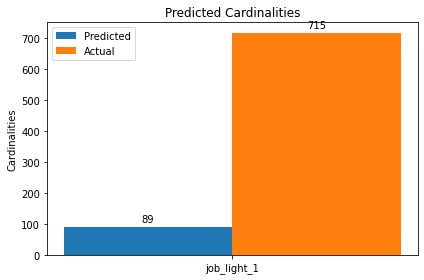

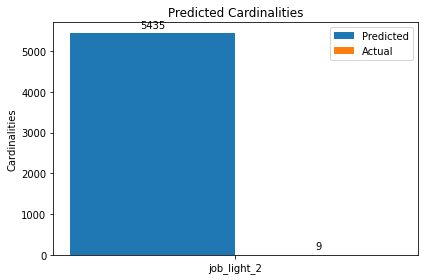

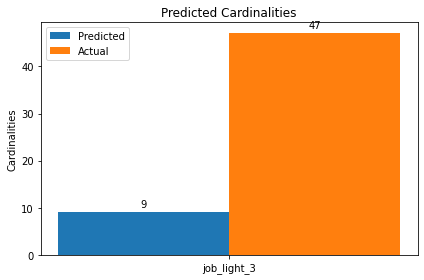

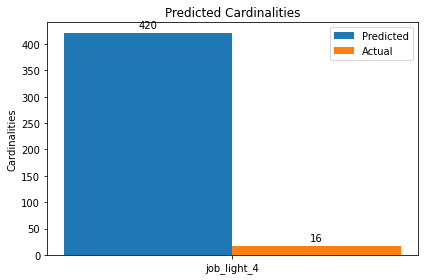

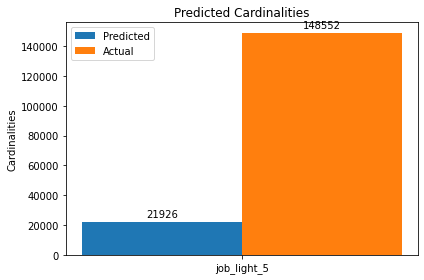

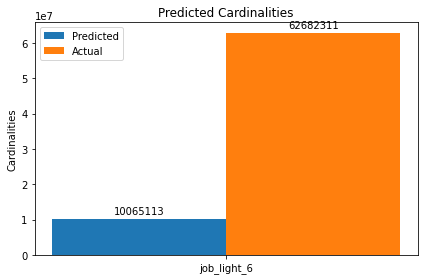

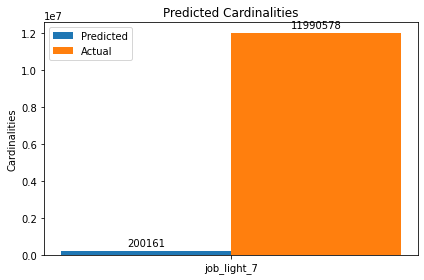

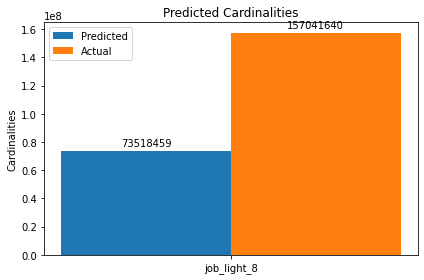

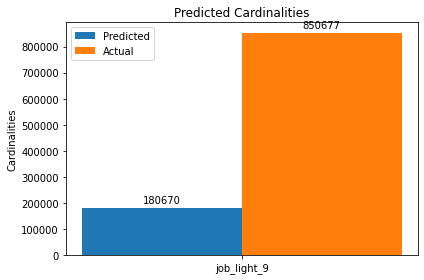

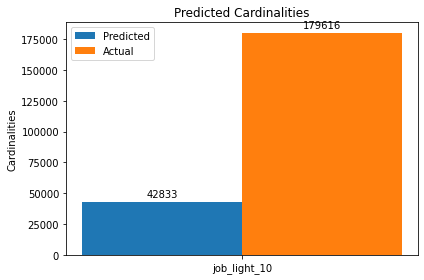

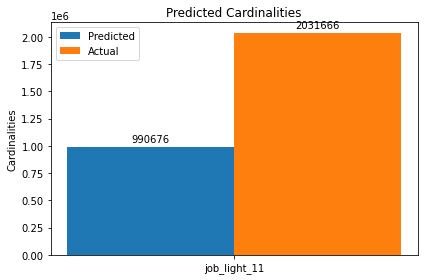

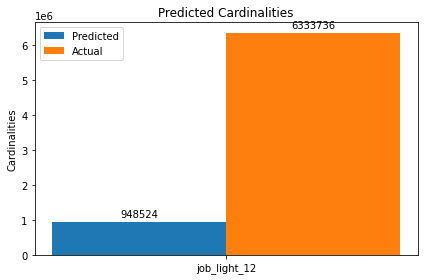

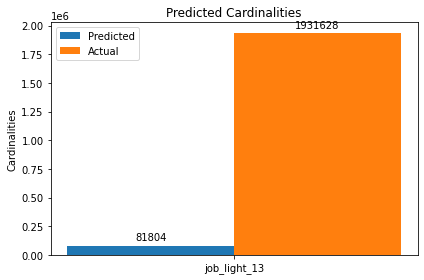

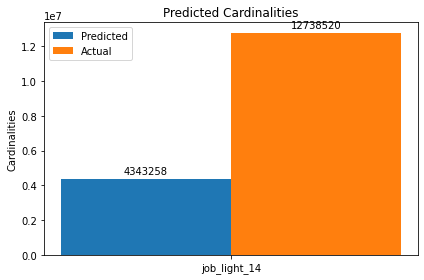

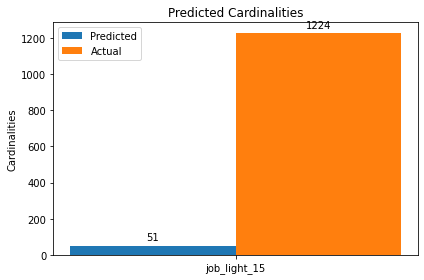

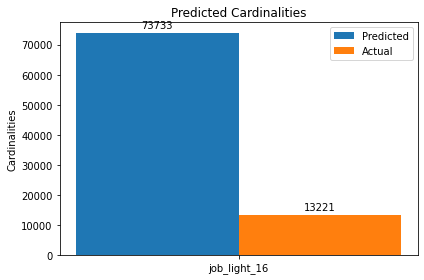

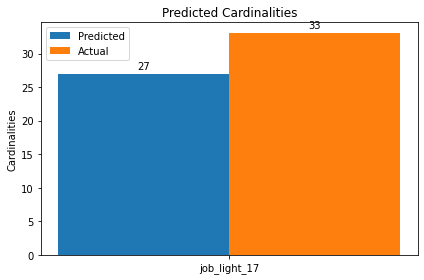

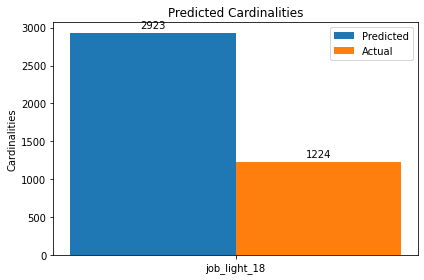

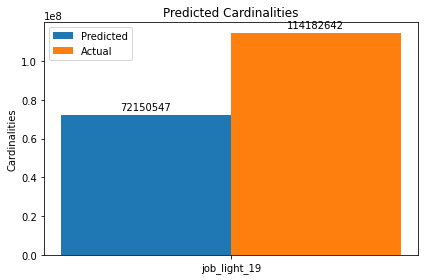

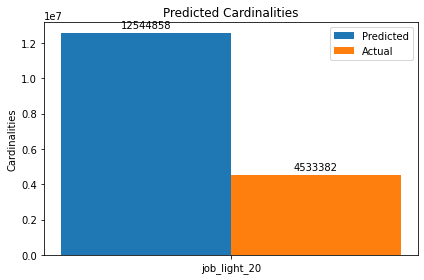

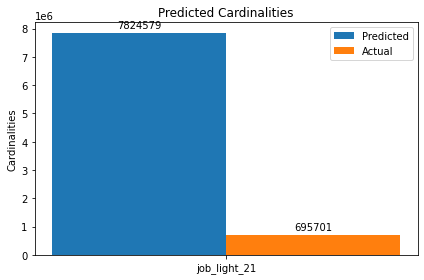

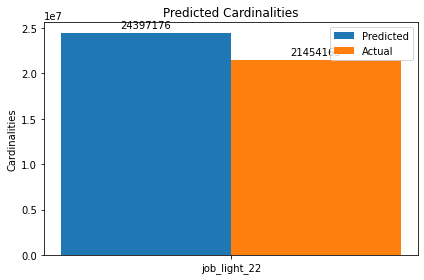

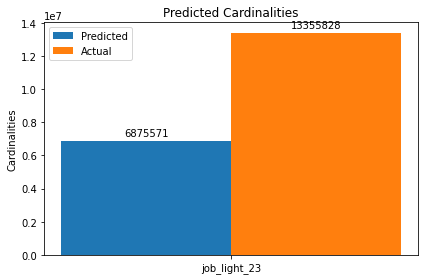

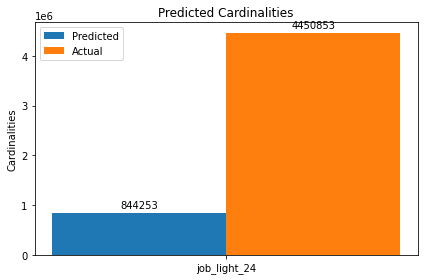

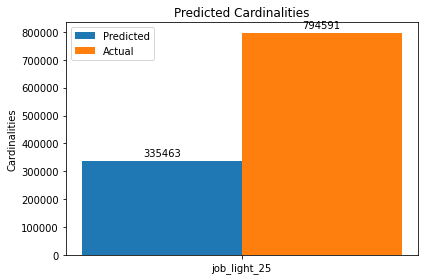

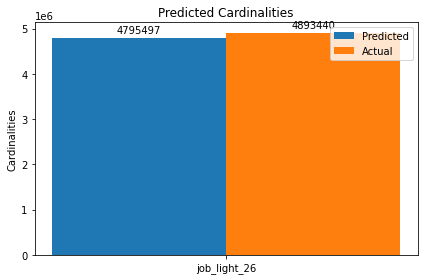

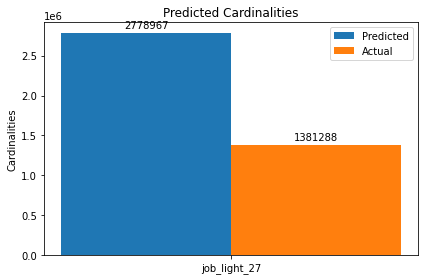

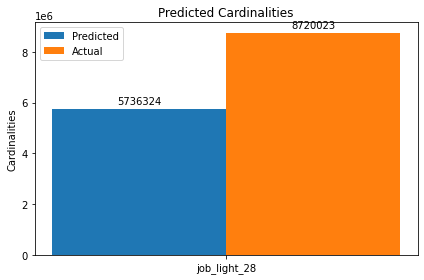

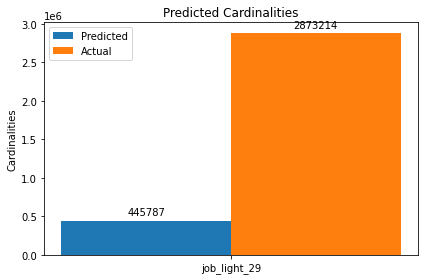

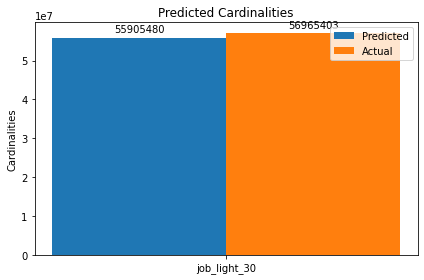

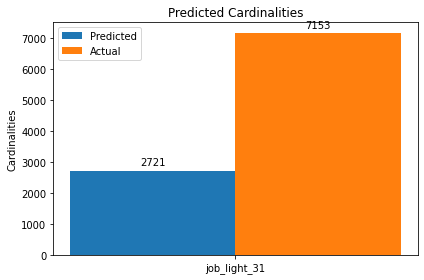

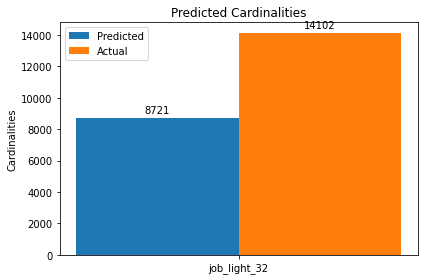

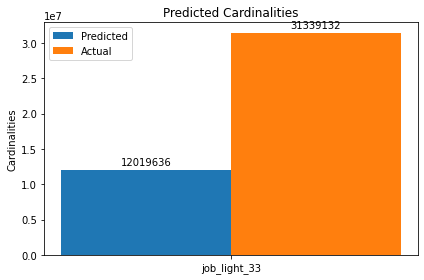

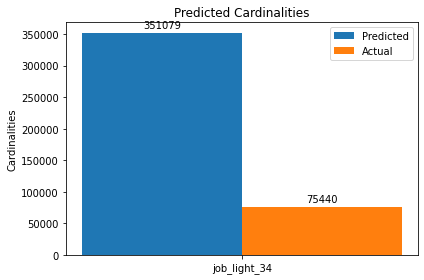

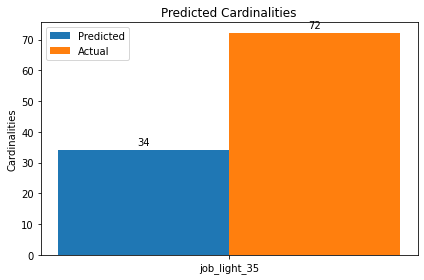

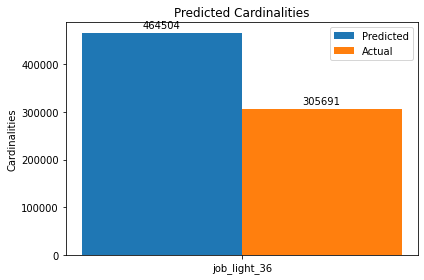

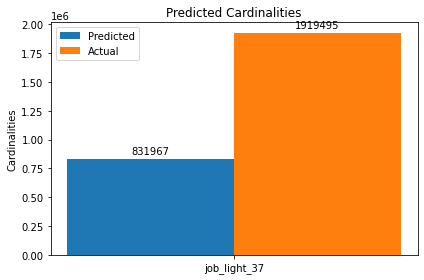

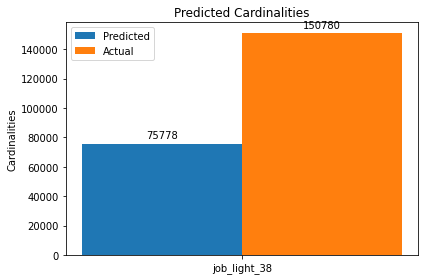

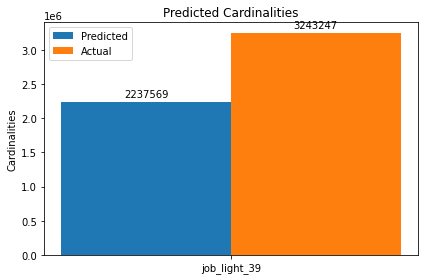

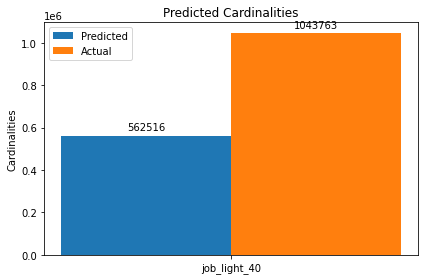

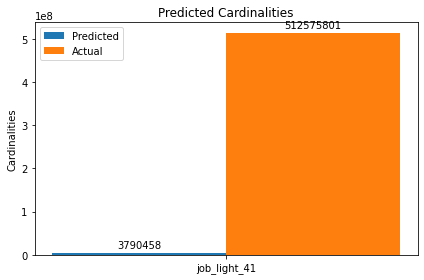

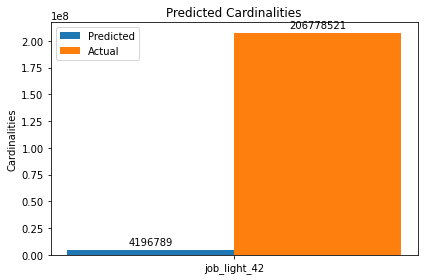

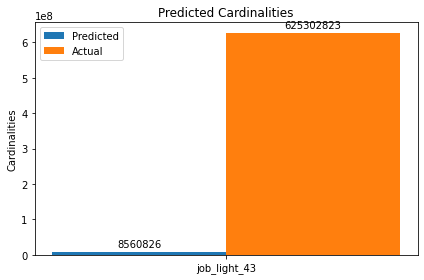

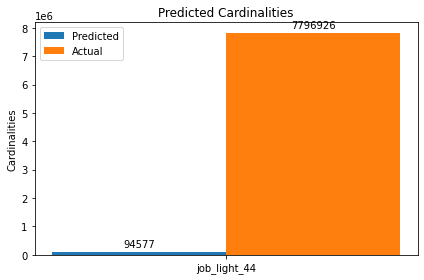

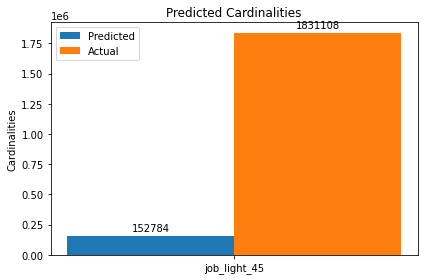

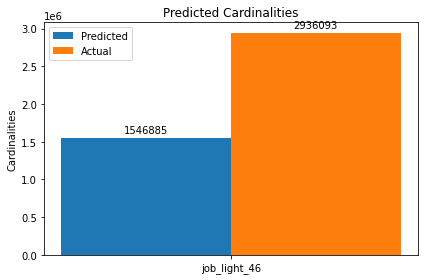

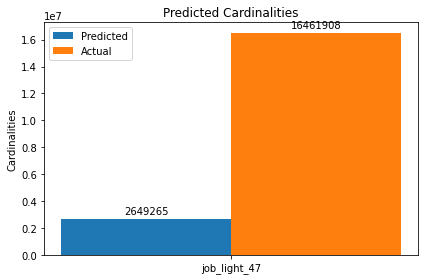

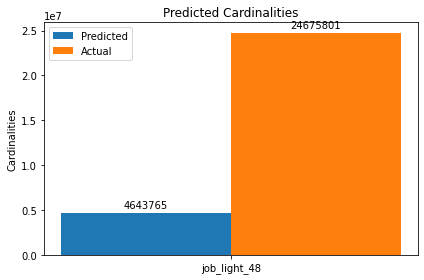

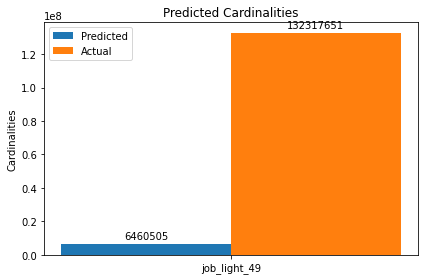

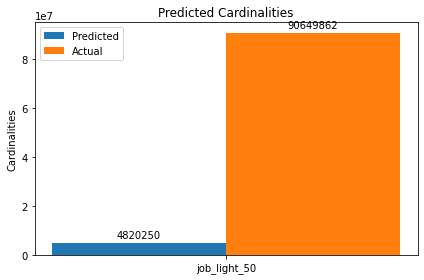

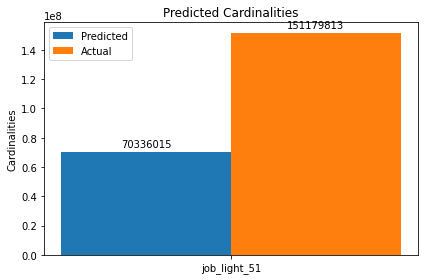

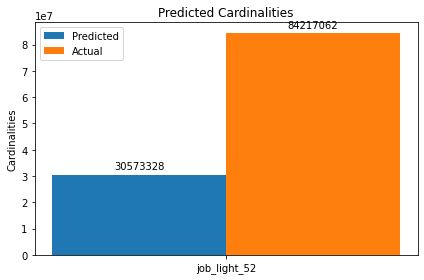

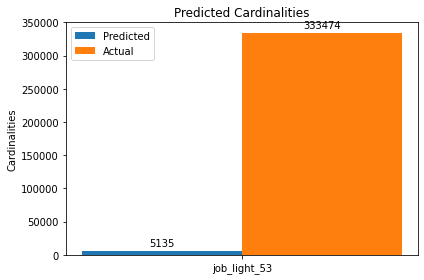

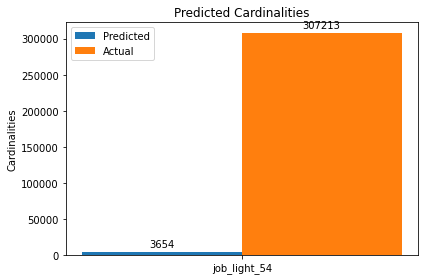

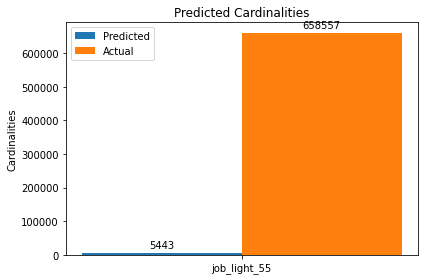

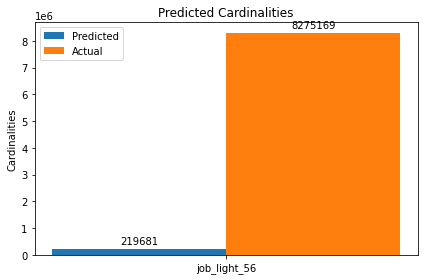

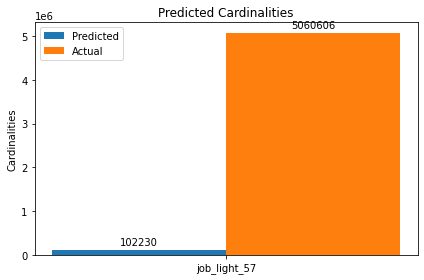

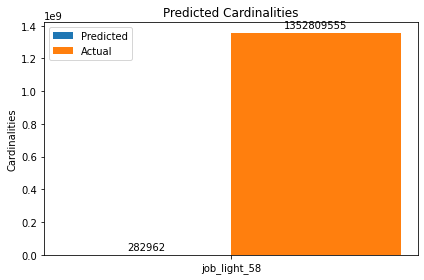

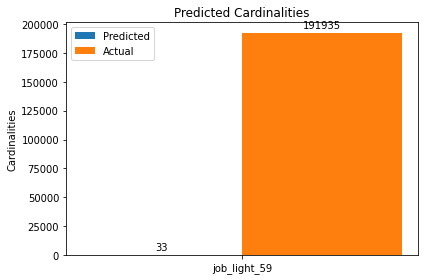

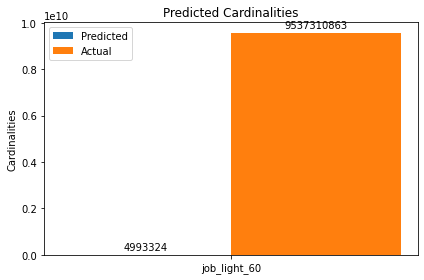

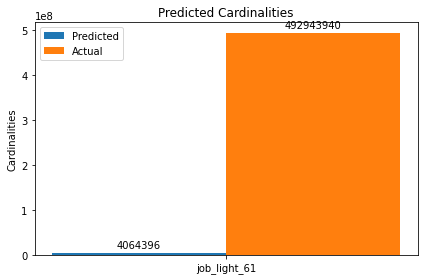

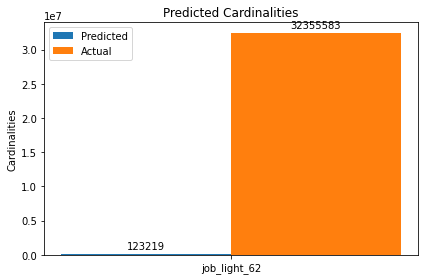

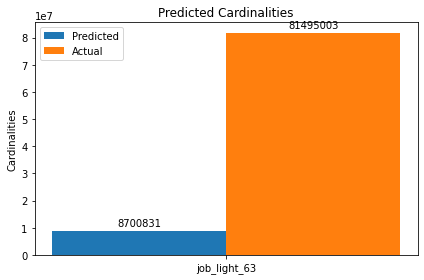

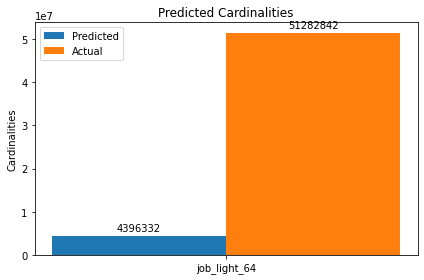

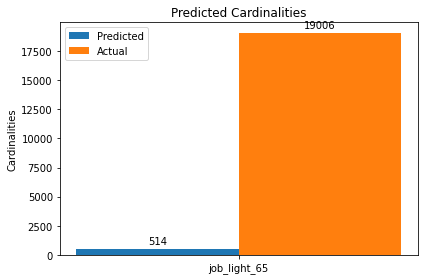

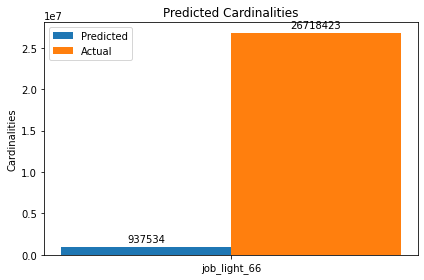

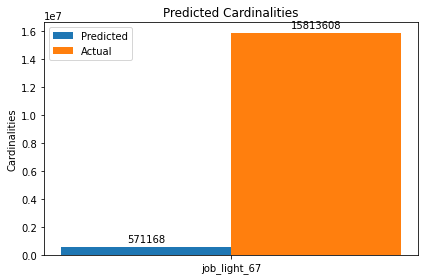

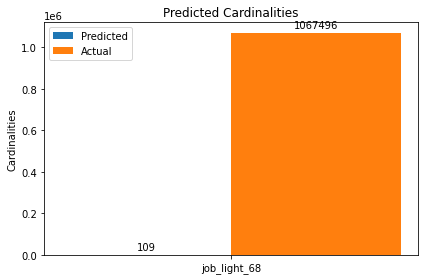

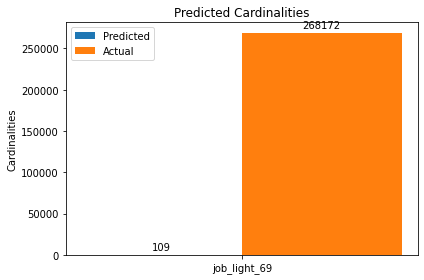

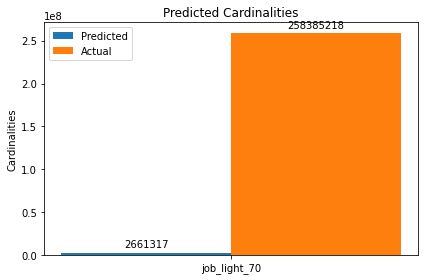

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math 

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

def autolabel(rects):
#   """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round_down(rect.get_height(), 3)
        height = rect.get_height()
        ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

queries_selected=[]
for i in queries:
  if i not in train_data_keys:
    queries_selected.append(i)
dps=[]
das=[]
for q in range(0,len(queries)):
  if not queries[q] in train_data_keys:
    das.append(denorm_actual_sel[q])
    dps.append(denorm_pred_sel[q])
init=0
step=1
while (init<len(queries_selected)):
   if init+step>len(queries_selected):
      step=len(queries_selected)-init
   labels = queries_selected[init:init+step]
   x = np.arange(len(labels))  # the label locations
   width = 0.35  # the width of the bars

   fig, ax = plt.subplots()
   rects1 = ax.bar(x - width/2, dps[init:init+step], width, label='Predicted')
   rects2 = ax.bar(x + width/2, das[init:init+step], width, label='Actual')

#   # Add some text for labels, title and custom x-axis tick labels, etc.
   ax.set_ylabel('Cardinalities')
   ax.set_title('Predicted Cardinalities')
   ax.set_xticks(x)
   ax.set_xticklabels(labels)
   #ax.set_ylim(0, 1.2)
   ax.legend()
   init+=step
   autolabel(rects1)
   autolabel(rects2)
   fig.tight_layout()
   plt.show()

In [ ]:
t=[]
cr=[]
t_dn=[]
cr_dn=[]
test_set=[]
train_set=[]
train_dn=[]
train_n=[]
for i in range(0,len(q_names)):
  if not q_names[i] in train_data_keys:
    t.append(target[i])
    t_dn.append(denorm_actual_sel[i])
    cr_dn.append(denorm_pred_sel[i])
    cr.append(clean_results[i])
    test_set.append(q_names[i])
  else: #COMMENT 3/3(please undo this mixing of them before testing, by commenting out this else, and adding the predicate to the True)
    train_dn.append(denorm_actual_sel[i])
    train_n.append(target[i])
    train_set.append(q_names[i])
print("Test set (FYI)")
print(test_set)
print("Train set (FYI)")
print(train_set)


Test set (FYI)
['job_light_1', 'job_light_2', 'job_light_3', 'job_light_4', 'job_light_5', 'job_light_6', 'job_light_7', 'job_light_8', 'job_light_9', 'job_light_10', 'job_light_11', 'job_light_12', 'job_light_13', 'job_light_14', 'job_light_15', 'job_light_16', 'job_light_17', 'job_light_18', 'job_light_19', 'job_light_20', 'job_light_21', 'job_light_22', 'job_light_23', 'job_light_24', 'job_light_25', 'job_light_26', 'job_light_27', 'job_light_28', 'job_light_29', 'job_light_30', 'job_light_31', 'job_light_32', 'job_light_33', 'job_light_34', 'job_light_35', 'job_light_36', 'job_light_37', 'job_light_38', 'job_light_39', 'job_light_40', 'job_light_41', 'job_light_42', 'job_light_43', 'job_light_44', 'job_light_45', 'job_light_46', 'job_light_47', 'job_light_48', 'job_light_49', 'job_light_50', 'job_light_51', 'job_light_52', 'job_light_53', 'job_light_54', 'job_light_55', 'job_light_56', 'job_light_57', 'job_light_58', 'job_light_59', 'job_light_60', 'job_light_61', 'job_light_62', '

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error (normalized): "+str(mean_absolute_error(t, cr)))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(t, cr)
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

from sklearn.metrics import explained_variance_score, max_error, mean_squared_log_error, median_absolute_error, r2_score, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance

evs=explained_variance_score(t, cr)
print("Explained variance score (normalized): "+str(evs))

me=max_error(t, cr)
print("Max error (normalized): "+str(me))

msle=mean_squared_log_error(t, cr)
print("Mean squared log error (normalized): "+str(msle))

mae=median_absolute_error(t, cr)
print("Median absolute error (normalized): "+str(mae))

r2score=r2_score(t, cr)
print("R2 score (normalized): "+str(r2score))

mpd=mean_poisson_deviance(t, cr)
print("Mean Poisson deviance (normalized): "+str(mpd))

#mgd=mean_gamma_deviance(t, cr)
#print("Mean Gamma deviance: "+str(mgd))

#mgd=mean_tweedie_deviance(t, cr)
#print("Mean tweedie deviance: "+str(mtd))

Mean absolute error (normalized): 0.11194148195730244
Mean squared error (normalized): 0.02184031598194078
Root mean squared error (normalized): 0.14778469468094718
Explained variance score (normalized): 0.6379074477556421
Max error (normalized): 0.39975608125551887
Mean squared log error (normalized): 0.009611091679069417
Median absolute error (normalized): 0.08034363437618203
R2 score (normalized): 0.432129277773758
Mean Poisson deviance (normalized): 0.0523789553468367


When done...

In [ ]:
# import seaborn as sns; sns.set()
# vars = tf.trainable_variables()
# #print(vars) #some infos about variables...
# vars_vals = _sess.run(vars, feed_dict={is_training:False})
# np.set_printoptions(threshold=np.inf)
# palette=sns.color_palette("Blues")
# plt_size=(16,10)
# for var, val in zip(vars, vars_vals):
#     #print("var: {}".format(var.name)) #...or sort it in a list..., value: {} val
#     if var.name=="tables_network/fully_connected/weights:0":
#       print("table input weights:")
#       plt.figure(figsize=plt_size)
#       ax = sns.heatmap(val, cmap=palette)
#       plt.show()
#       #print(val)
#     if var.name=="joins_network/fully_connected/weights:0":
#       print("joins input weights:")
#       plt.figure(figsize=plt_size)
#       ax = sns.heatmap(val, cmap=palette)
#       plt.show()
#     if var.name=="and_network/fully_connected/weights:0":
#       print("and input weights:")
#       plt.figure(figsize=plt_size)
#       ax = sns.heatmap(val, cmap=palette)
#       plt.show()
#     if var.name=="normalized_and_network/fully_connected/weights:0":
#       print("normalized and input weights:")
#       plt.figure(figsize=plt_size)
#       ax = sns.heatmap(val, cmap=palette)
#       plt.show()
#     if var.name=="or_network/fully_connected/weights:0":
#       print("or input weights:")
#       plt.figure(figsize=plt_size)
#       ax = sns.heatmap(val, cmap=palette)
#       plt.show()
#     if var.name=="nested_or_network/fully_connected/weights:0":
#       print("nested or input weights:")
#       plt.figure(figsize=plt_size)
#       ax = sns.heatmap(val, cmap=palette)
#       plt.show()
#     if var.name=="network/fully_connected/weights:0": #<=This one we might need to do differently
#       print("overall concat weights:")
#       plt.figure(figsize=plt_size)
#       ax = sns.heatmap(val, cmap=palette)
#       plt.show()


In [ ]:
# #Labels/Errors
# f= open("../tmp/labels.txt","w+")
# for item in range(0,len(result[0])):
#   f.write(str(abs(int(round(10**((result[0][item][0]*max_cardinality))))-int(round(10**(target[item]*max_cardinality)))))+"\n")
# f.close()

# #Labels/Errors
# f= open("../tmp/labels2.txt","w+")
# for item in range(0,len(result[0])):
#   f.write(str(q_names[item])+"\n")
# f.close()

What improvements could we add?

1.   Samples and other query sets
2.   Model understanding
3.   Compare to simple regressors

4.   And, of course, more hyper-parameter tuning and tests...   (but this might never end! ;)




**Regressors** 

In [ ]:
from scipy.sparse import csr_matrix
rowsize=17504
job_full=False
kipf_train=False
job_light=True
our_own=False
if job_full:
  rowsize=17504
elif kipf_train:
  rowsize=10#Or whatever it is
elif job_light:
  rowsize=21*max_tables_in_query + 64 * max_joins_in_query + (3+70+1) * max_predicates_in_query 
else: #our own
  rowsize=10
  
rows=[]
columns=[]
data=[]
row_count=0
for data_item in range(0,len(tables_input)):
  if q_names[data_item] in train_data_keys:
    col_count=0
    for table in tables_input[data_item]:
      for number in table:
        if number!=0:
          rows.append(row_count)
          columns.append(col_count)
          data.append(number)
        col_count+=1
    for join in joins_input[data_item]:
      for number in join:
        if number!=0:
          rows.append(row_count)
          columns.append(col_count)
          data.append(number)
        col_count+=1
    for ands in normalized_and_input[data_item]:
      for number in ands:
        if number!=0:
          rows.append(row_count)
          columns.append(col_count)
          data.append(number)
        col_count+=1
    row_count+=1


x_train=csr_matrix((np.array(data),(np.array(rows),np.array(columns))), shape=(row_count,rowsize))

rows=[]
columns=[]
data=[]
row_count=0
for data_item in range(0,len(tables_input)):
  if not q_names[data_item] in train_data_keys:
    col_count=0
    for table in tables_input[data_item]:
      for number in table:
        if number!=0:
          rows.append(row_count)
          columns.append(col_count)
          data.append(number)
        col_count+=1
    for join in joins_input[data_item]:
      for number in join:
        if number!=0:
          rows.append(row_count)
          columns.append(col_count)
          data.append(number)
        col_count+=1
    for ands in normalized_and_input[data_item]:
      for number in ands:
        if number!=0:
          rows.append(row_count)
          columns.append(col_count)
          data.append(number)
        col_count+=1
    row_count+=1

x_test=csr_matrix((np.array(data),(np.array(rows),np.array(columns))), shape=(row_count,rowsize))
y_test=t
y_train=train_n

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error

tree = DecisionTreeRegressor(criterion='mse', max_depth=3) 
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("Decision Tree Regressor")
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

r= MLPRegressor()
r.fit(x_train, y_train)
y_pred=r.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("MLP Regressor")
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

r= SVR()
r.fit(x_train, y_train)
y_pred=r.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("SVR Regressor")
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

rfr= RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("Random Forest Regressor")
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("Linear Regressor")
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

r= Ridge()
r.fit(x_train, y_train)
y_pred=r.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("Ridge Regressor")
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

r= Lasso()
r.fit(x_train, y_train)
y_pred=r.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("Lasso Regressor")
print("Mean squared error (normalized): "+str(mse))
print("Root mean squared error (normalized): "+str(math.sqrt(mse)))


Decision Tree Regressor
Mean squared error (normalized): 0.06253407051628213
Root mean squared error (normalized): 0.2500681317486939
MLP Regressor
Mean squared error (normalized): 0.04922473082559185
Root mean squared error (normalized): 0.22186647071063229
SVR Regressor
Mean squared error (normalized): 0.06211803224678993
Root mean squared error (normalized): 0.24923489371833538
Random Forest Regressor
Mean squared error (normalized): 0.05331143178679944
Root mean squared error (normalized): 0.23089268456752682
Linear Regressor
Mean squared error (normalized): 0.07759070792753413
Root mean squared error (normalized): 0.27855108674628093
Ridge Regressor
Mean squared error (normalized): 0.0776833282066821
Root mean squared error (normalized): 0.2787172908283268
Lasso Regressor
Mean squared error (normalized): 0.05052757923055616
Root mean squared error (normalized): 0.224783405149393


In [ ]:
# from sklearn.tree import DecisionTreeRegressor 
# from sklearn.metrics import r2_score,mean_squared_error
# tree = DecisionTreeRegressor(criterion='mse', max_depth=3) 
# tree.fit(x_train, y_train)
# y_pred=tree.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Decision Tree Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

In [ ]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import r2_score,mean_squared_error

# r= MLPRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("MLP Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import r2_score,mean_squared_error
# gbr= GradientBoostingRegressor()
# gbr.fit(x_train, y_train)
# y_pred=gbr.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Gradient Boosted Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

In [ ]:
# #This is good
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score,mean_squared_error
# rfr= RandomForestRegressor()
# rfr.fit(x_train, y_train)
# y_pred=rfr.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Random Forest Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

In [ ]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.metrics import r2_score,mean_squared_error
# gpr= GaussianProcessRegressor()
# gpr.fit(x_train.toarray(), y_train)
# y_pred=gpr.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("Gaussian Process Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

In [ ]:
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.metrics import r2_score,mean_squared_error
# krr= KernelRidge()
# krr.fit(x_train, y_train)
# y_pred=krr.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Kernel Ridge Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

In [ ]:
# from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
# from sklearn.metrics import r2_score,mean_squared_error
# lr= LinearRegression()
# lr.fit(x_train, y_train)
# y_pred=lr.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Linear Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= Ridge()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Ridge Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# #This is good
# r= RidgeCV()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("RidgeCV Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= SGDRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("SGD Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= ElasticNet()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("ElasticNet Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= ElasticNetCV()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("ElasticNetCV Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= Lars()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("Lars Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= LarsCV()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("Lars CV Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))


# r= Lasso()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Lasso Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= LassoCV()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("LassoCV Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= LassoLars()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("LassoLars Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= LassoLarsCV()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("LassoLarsCV Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= LassoLarsIC()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("LassoLarsIC Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= OrthogonalMatchingPursuit()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("OrthogonalMatchingPursuit Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= OrthogonalMatchingPursuitCV()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("OrthogonalMatchingPursuitCV Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))


In [ ]:
# from sklearn.linear_model import PassiveAggressiveRegressor #PoissonRegressor#, TweedieRegressor, GammaRegressor
# from sklearn.metrics import r2_score,mean_squared_error
# """
# r= PoissonRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Poisson Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= TweedieRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Tweedie Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= GammaRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Gamma Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))
# """
# r= PassiveAggressiveRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("PassiveAggressive Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
# from sklearn.metrics import r2_score,mean_squared_error

# r= KNeighborsRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("K Neighbors Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# """
# r= RadiusNeighborsRegressor()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Radius Neighbors Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))
# """


In [ ]:
# from sklearn.svm import LinearSVR, NuSVR, SVR
# from sklearn.metrics import r2_score,mean_squared_error

# r= LinearSVR()
# r.fit(x_train, y_train)

# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("LinearSVR Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# #This is good
# r= NuSVR()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("NuSVR Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# #This is good
# r= SVR()
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("SVR Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))


In [ ]:
# from sklearn.linear_model import ARDRegression, BayesianRidge, HuberRegressor, RANSACRegressor, TheilSenRegressor
# from sklearn.metrics import r2_score,mean_squared_error

# r= BayesianRidge()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("Bayesian Ridge Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= HuberRegressor(max_iter=1000)
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("Huber Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= RANSACRegressor(min_samples=20)
# r.fit(x_train, y_train)
# y_pred=r.predict(x_test)
# mse=mean_squared_error(y_test, y_pred)
# print("RANSAC Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# r= TheilSenRegressor()
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("TheilSen Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))

# """
# r= ARDRegression()#Time consuming one...
# r.fit(x_train.toarray(), y_train)
# y_pred=r.predict(x_test.toarray())
# mse=mean_squared_error(y_test, y_pred)
# print("ARD Regressor")
# print("Mean squared error (normalized): "+str(mse))
# print("Root mean squared error (normalized): "+str(math.sqrt(mse)))
# """

**Model Understanding**

Here we have the following choices:
Model agnostic
*   Shapley values using a proxy interpretable model: This allows global + instance-based analysis.
*   Instance-based analysis, by using projections and looking closely at instances
Model-specific ones
*   Deep Lift?


To add to our visualizations, we can plot in Projectors Tensorflow and try to understand the errors

In [ ]:
f= open("../tmp/instances.txt","w+")
for item in range(0,len(last_layer)):
  f.write("\t".join([str(x) for x in last_layer[item]])+"\n")
f.close()

Two Shapley-based libraries: https://github.com/slundberg/shap, https://github.com/interpretml/interpret We can still explore them better...

In [ ]:
# fit a GAM model to the data
import interpret.glassbox
import shap
run_shap=False
if run_shap:
  res=[int(round(math.e**min_cardinality+(x[0]*(max_cardinality-min_cardinality)))) for x in result[0]]
  model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
  model_ebm.fit(last_layer, res)





In [ ]:
if run_shap:
  # explain the GAM model with SHAP... This takes an insane amount of time (almost an hour or so)...!!! 
  explainer_ebm = shap.AdditiveExplainer(model_ebm, last_layer)
  shap_values_ebm = explainer_ebm.shap_values(last_layer)

In [ ]:
if run_shap:
  sample_ind=1#instance
  feat_nr=675
  # make a standard partial dependence plot with a single SHAP value overlaid
  fig,ax = shap.partial_dependence_plot(
    feat_nr, model_ebm.predict, last_layer, model_expected_value=True,
    feature_expected_value=True, show=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:],
    shap_value_features=last_layer[sample_ind:sample_ind+1,:]
  )

In [ ]:
if run_shap:
  instance_number=1
  shap.waterfall_plot(explainer_ebm.expected_value, shap_values_ebm[instance_number], last_layer[instance_number], max_display=25)

In [ ]:
if run_shap:
  # shap.summary_plot(shap_values_ebm, last_layer, max_display=150)
  shap.summary_plot(shap_values_ebm, last_layer, max_display=30)

In [ ]:
# use Kernel SHAP to explain test set predictions (did not work)
#explainer = shap.KernelExplainer(pred_fn, last_layer, link="logit")
#shap_values = explainer.shap_values(last_layer, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
#shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], last_layer[0,:], link="logit")

Others not tried yet (probably for much later, since they do not seem to add anything really new):


***Like Shapleys***
*   https://github.com/MarcelRobeer/ContrastiveExplanation 


***Model-specific***
*   https://github.com/kundajelab/deeplift


**Things we tried and did not really work out**

We tried with Shapley values from another library that seems to be similar to Shap (Issues, sadly, but it should have worked): https://github.com/SeldonIO/alibi


In [ ]:
"""def pred_fn(x):
  spl=np.hsplit(x, [256, 512,768, 1024,1280])
  to,jo,ao,nao,oo,noo= spl[0], spl[1], spl[2], spl[3], spl[4], spl[5]
  return np.array(_sess.run([cardinalities], feed_dict={is_training:False,
      tables_output:np.array(to, dtype=np.float32), joins_output:np.array(jo, dtype=np.float32), and_output:np.array(ao, dtype=np.float32), 
      normalized_and_output:np.array(nao, dtype=np.float32), or_output:np.array(oo, dtype=np.float32), nested_or_output:np.array(noo, dtype=np.float32)}))
"""
"""from alibi.explainers import KernelShap
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(last_layer)
ll = scaler.transform(last_layer)
sys.stdout=original_stdout

predict_fn = pred_fn
explainer = KernelShap(predict_fn, link='identity')
explainer.fit(np.array(ll), summarise_background=True, n_background_samples=32)
print(explainer.expected_value)
"""
"""
from alibi.confidence.model_linearity import linearity_measure, _infer_feature_range

feature_range = _infer_feature_range(last_layer)
L = linearity_measure(predict_fn,
                      np.array([last_layer[]]),
                      feature_range=feature_range,
                      method='grid',
                      X_train=last_layer,
                      epsilon=0.04,
                      nb_samples=1,
                      res=100,
                      alphas=None,
                      agg='global',
                      model_type='regressor')
print(L)
"""

A method like Shapley: https://github.com/MI2DataLab/pyBreakDown, but sadly did not seem very maintained.

In [ ]:
#print(pred_fn(np.array([last_layer[0]])))
#explanation = explainer.explain(ll, l1_reg=False)
#explainer.explain(np.array([ll[0]]))#, summarise_result=True, cat_vars_start_idx=[0,256,512,768,1024,1280], cat_vars_enc_dim=[256,256,256,256,256,256])

In [ ]:
#%cd ../content
#!git clone https://github.com/bondyra/pyBreakDown
#%cd ./pyBreakDown
#%cd ..
#!python setup.py install  # (or use pip install . instead)

In [ ]:
#!pip install python-blist
#from pyBreakDown.explainer import Explainer
#from pyBreakDown.explanation import Explanation
#exp = Explainer(clf=pred_func, data=last_layer, colnames=[str(x) for x in range(0,1536)])
